**PROJECT 1: CONFIGURE GOOGLE AS HOST**

Cloud-based notebooks provide a remote workspace with stronger resources than our local laptop might allow. Cloud notebooks permit us to share our work with others, such as coworkers, similar to GitHub.
The Colab, which are Google-hosted notebooks. Some setup is required, so we'll start there before getting back to the basics of PySpark.

In [2]:
import pandas as pd
drivers_df = pd.read_csv("cleaned_data/drivers_sample.csv")

In [3]:
drivers_df.head()

,DRIVER_ID,GENDER,CREDIT_SCORE,AGE,VEHICLE_ID
0,1,2.0,824,27.0,7420963
1,2,1.0,824,28.0,7420963
2,3,2.0,666,51.0,7396448
3,4,2.0,666,34.0,6208988
4,5,2.0,824,88.0,6078430


In [4]:
drivers_df.dtypes

DRIVER_ID         int64
GENDER          float64
CREDIT_SCORE      int64
AGE             float64
VEHICLE_ID        int64
dtype: object

In [ ]:
drivers_df = drivers_df[drivers_df['BIRTHDATE'].notnull()]
drivers_df.isna().sum()

In [27]:
drivers_df = drivers_df[drivers_df['GENDER'].notnull()]
drivers_df.isna().sum()

DRIVERID     0
GENDER       0
BIRTHDATE    0
CREDSCORE    0
HLDIID       0
dtype: int64

In [28]:
drivers_df['BIRTHDATE'] = pd.to_datetime(drivers_df['BIRTHDATE'], format='%m/%d/%Y')
drivers_df.tail()

,DRIVERID,GENDER,BIRTHDATE,CREDSCORE,HLDIID
1048547,113401787,M,1960-09-09,542,7191251
1048548,113401788,F,1992-12-10,542,7191251
1048549,113401804,F,1978-08-05,710,6715449
1048550,113401816,M,1977-05-11,418,6075136
1048551,113401834,M,1958-10-09,847,6363542


In [29]:
now = pd.Timestamp('now')
drivers_df['BIRTHDATE'] = drivers_df['BIRTHDATE'].where(drivers_df['BIRTHDATE'] < now)
drivers_df.head()

,DRIVERID,GENDER,BIRTHDATE,CREDSCORE,HLDIID
0,104132812,F,1990-07-01,824,7399455
1,104132854,F,1933-11-06,824,6078430
2,104132876,F,1987-12-14,750,6212210
3,104132895,F,1999-10-22,750,7416184
4,104132907,F,1933-11-06,824,6078430


In [30]:
then_started = pd.Timestamp(1930,1,1)
then_started

Timestamp('1930-01-01 00:00:00')

In [31]:
drivers_df['BIRTHDATE'] = drivers_df['BIRTHDATE'].where(drivers_df['BIRTHDATE'] > then_started)
drivers_df.head()

,DRIVERID,GENDER,BIRTHDATE,CREDSCORE,HLDIID
0,104132812,F,1990-07-01,824,7399455
1,104132854,F,1933-11-06,824,6078430
2,104132876,F,1987-12-14,750,6212210
3,104132895,F,1999-10-22,750,7416184
4,104132907,F,1933-11-06,824,6078430


In [32]:
# Covert Bith Date field to Age
import numpy as np
now = pd.Timestamp('now')

drivers_df['AGE'] = drivers_df['BIRTHDATE'].apply(lambda x: now.year - x.year - ((now.month, now.day) < (x.month, x.day)))

In [33]:
drivers_df.head()

,DRIVERID,GENDER,BIRTHDATE,CREDSCORE,HLDIID,AGE
0,104132812,F,1990-07-01,824,7399455,32.0
1,104132854,F,1933-11-06,824,6078430,88.0
2,104132876,F,1987-12-14,750,6212210,34.0
3,104132895,F,1999-10-22,750,7416184,22.0
4,104132907,F,1933-11-06,824,6078430,88.0


In [34]:
# Once Birth date is merged to the Data Frame, remove the Birth Date column
drivers_df.drop('BIRTHDATE', axis=1, inplace=True)
drivers_df.head()

,DRIVERID,GENDER,CREDSCORE,HLDIID,AGE
0,104132812,F,824,7399455,32.0
1,104132854,F,824,6078430,88.0
2,104132876,F,750,6212210,34.0
3,104132895,F,750,7416184,22.0
4,104132907,F,824,6078430,88.0


In [35]:
# Drop credit score is not number - default credit ratings
drivers_df = drivers_df[pd.to_numeric(drivers_df['CREDSCORE'],errors='coerce').notna()]
drivers_df = drivers_df.dropna(subset=['CREDSCORE'])
drivers_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 985912 entries, 0 to 1048551
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   DRIVERID   985912 non-null  int64  
 1   GENDER     985912 non-null  object 
 2   CREDSCORE  985912 non-null  object 
 3   HLDIID     985912 non-null  int64  
 4   AGE        985213 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 45.1+ MB


In [38]:
drivers_df['CREDSCORE'] = drivers_df['CREDSCORE'].astype(float)
drivers_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 985912 entries, 0 to 1048551
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   DRIVERID   985912 non-null  int64  
 1   GENDER     985912 non-null  object 
 2   CREDSCORE  985912 non-null  float64
 3   HLDIID     985912 non-null  int64  
 4   AGE        985213 non-null  float64
dtypes: float64(2), int64(2), object(1)
memory usage: 45.1+ MB


In [39]:
# GENDER operation X is binary_gender nan is unknown input fill with 0
drivers_df['GENDER'] = drivers_df['GENDER'].fillna(0)
new_data = {   
    'M':1,
    'F':2,
    'X':3
}
# Change Genders Numeric values
drivers_df['GENDER'] = drivers_df['GENDER'].map(new_data)

In [40]:
drivers_df['GENDER'].unique()

array([2, 1], dtype=int64)

In [41]:
# Check all odd that might exists
drivers_df = drivers_df.dropna()
print ("Rows     : " , drivers_df.shape[0])
print ("Columns  : " , drivers_df.shape[1])
print ("\nFeatures : \n" , drivers_df.columns.tolist())
print ("\nMissing values :  ", drivers_df.isnull().sum().values.sum())
print ("\nUnique values :  \n",drivers_df.nunique())

Rows     :  985213
Columns  :  5

Features : 
 ['DRIVERID', 'GENDER', 'CREDSCORE', 'HLDIID', 'AGE']

Missing values :   0

Unique values :  
 DRIVERID     746862
GENDER            2
CREDSCORE       599
HLDIID        58347
AGE              93
dtype: int64


In [42]:
# Rename the column Easier to read and consistent format
drivers_df = drivers_df.rename(columns={'DRIVERID':'DRIVER_ID', 'CREDSCORE':'CREDIT_SCORE', 'HLDIID':'VEHICLE_ID'})
drivers_df.head()

,DRIVER_ID,GENDER,CREDIT_SCORE,VEHICLE_ID,AGE
0,104132812,2,824.0,7399455,32.0
1,104132854,2,824.0,6078430,88.0
2,104132876,2,750.0,6212210,34.0
3,104132895,2,750.0,7416184,22.0
4,104132907,2,824.0,6078430,88.0


In [43]:
# Let's check corr- high values? The realtionship with vehicle and credit score is high
drivers_df.corr()

,DRIVER_ID,GENDER,CREDIT_SCORE,VEHICLE_ID,AGE
DRIVER_ID,1.000000,-0.010173,0.097850,0.108748,0.015577
GENDER,-0.010173,1.000000,-0.041136,0.035127,-0.004984
CREDIT_SCORE,0.097850,-0.041136,1.000000,0.212360,0.091330
VEHICLE_ID,0.108748,0.035127,0.212360,1.000000,0.026650
AGE,0.015577,-0.004984,0.091330,0.026650,1.000000


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


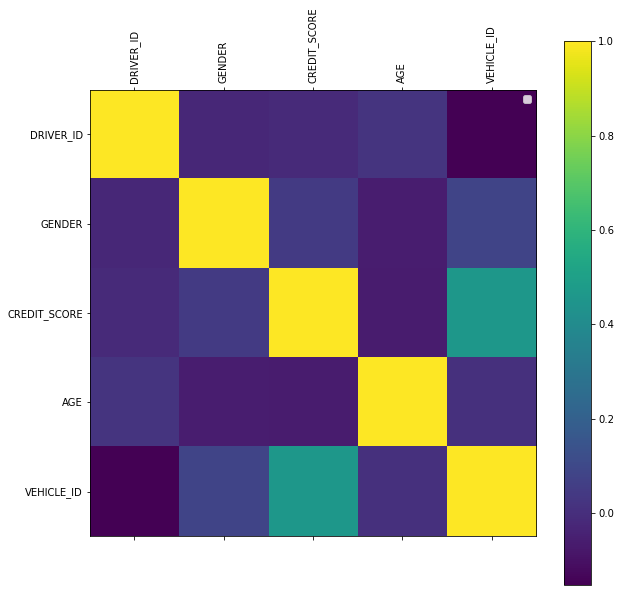

In [6]:
# Let's plot corr- high values? The realtionship with vehicle and credit score is high
import matplotlib.pyplot as plt
def plot_corr(df, size=10):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.legend()
    cax = ax.matshow(corr)
    fig.colorbar(cax)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical')
    plt.yticks(range(len(corr.columns)), corr.columns)

plot_corr(drivers_df)  

<AxesSubplot:ylabel='Frequency'>

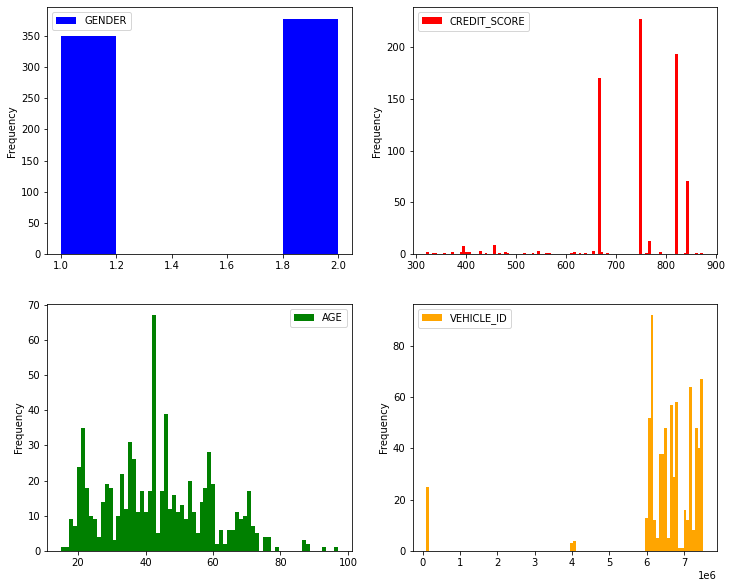

In [7]:
# let's take an individual categories how it is distributed
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,10))
drivers_df.plot(kind='hist', y='GENDER', bins=5, color='b', ax=axes[0][0])
drivers_df.plot(kind='hist', y='CREDIT_SCORE', bins=100, color='r', ax=axes[0][1])
drivers_df.plot(kind='hist', y='AGE', bins=70, color='g', ax=axes[1][0])
drivers_df.plot(kind='hist', y='VEHICLE_ID', bins=100, color='orange', ax=axes[1][1])

In [46]:
drivers_df.to_csv("raw_converted_data/drivers.csv", index=False)